In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_excel("Telco_customer_churn.xlsx")

In [3]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [4]:
df.shape
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [5]:
df.Country.unique()

array(['United States'], dtype=object)

In [6]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

Text(0.5, 1.0, 'Destribution of Churn')

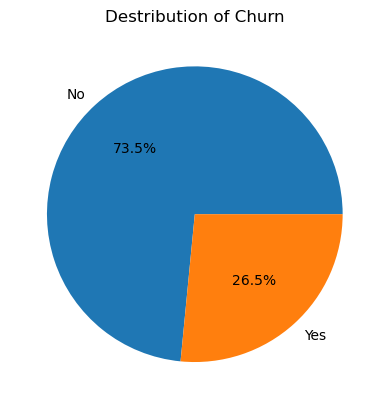

In [7]:
#Analyze data

churn_count = df["Churn Value"].value_counts()

plt.pie(
    churn_count,
    labels = ["No", "Yes"],
    autopct = "%1.1f%%"
)
plt.title("Destribution of Churn")

[Text(0, 0, '3555'), Text(0, 0, '3488')]

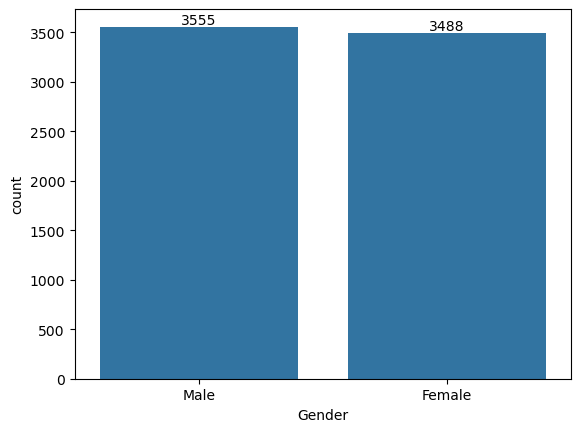

In [8]:
gender_count = df["Gender"].value_counts()

ax = sns.barplot( gender_count )
ax.bar_label(ax.containers[0])

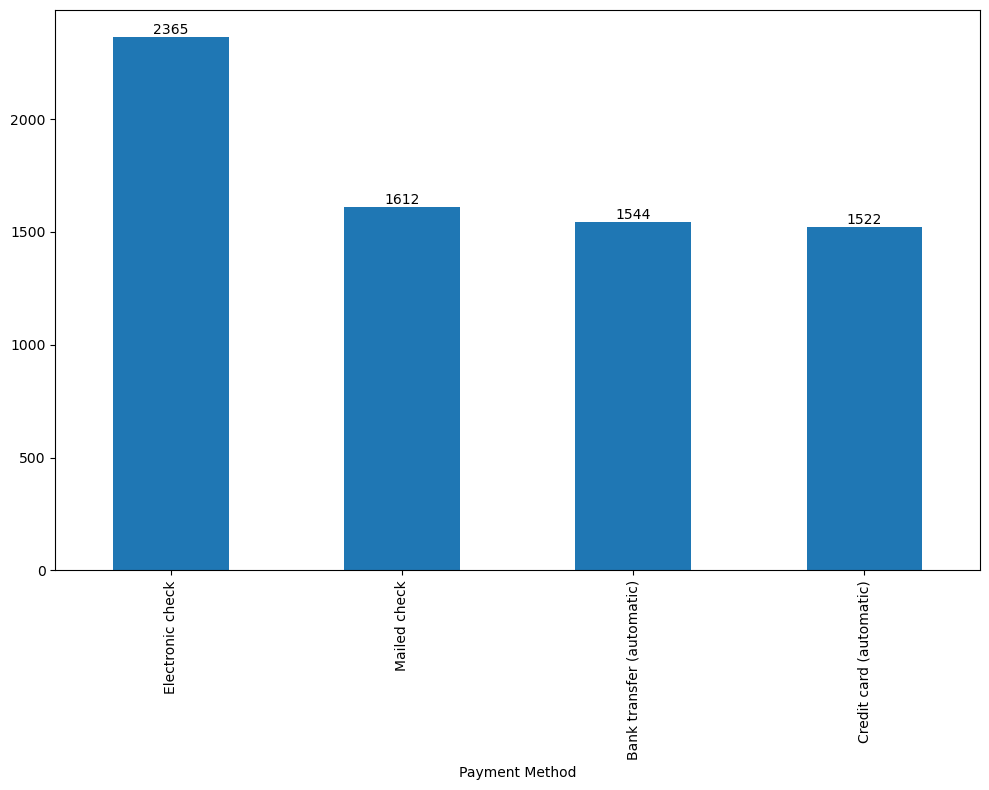

In [9]:
payment_method_count = df["Payment Method"].value_counts()
plt.figure(figsize =(10, 8))
payment_method_count.plot(kind='bar')
plt.bar_label(plt.gca().containers[0])
plt.tight_layout()
plt.show()

<Axes: xlabel='Churn Score', ylabel='Count'>

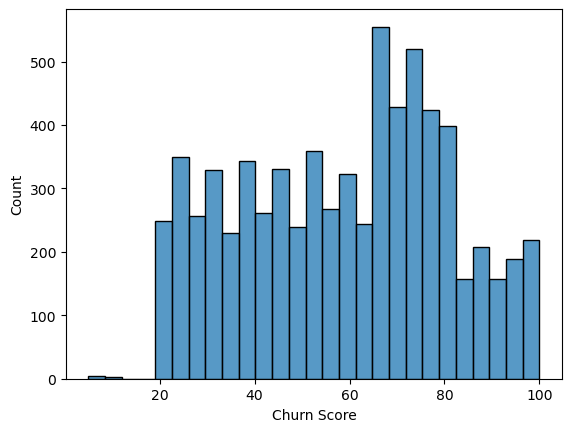

In [10]:
sns.histplot(
    df,
    x = "Churn Score"
)

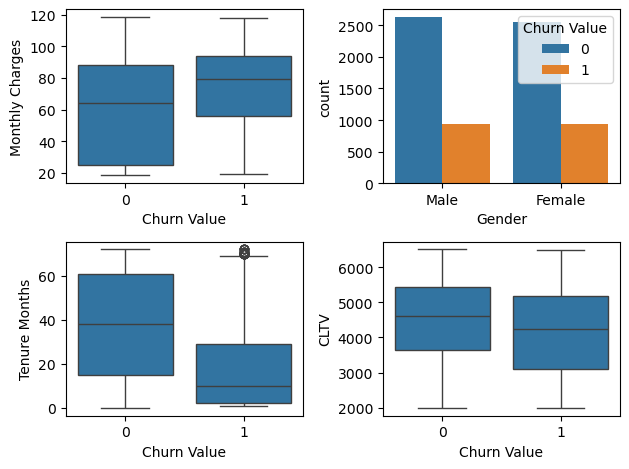

In [11]:
fig, axes = plt.subplots(2,2)

sns.boxplot(
    data = df,
    x = "Churn Value",
    y = "Monthly Charges",
    ax = axes[0, 0]
)
sns.countplot(
    data = df,
    hue = "Churn Value",
    x = "Gender",
    ax = axes[0,1]
)
sns.boxplot(
    df,
    x = "Churn Value",
    y = "Tenure Months",
    ax = axes[1,0]
)
sns.boxplot(
    df,
    x = "Churn Value",
    y = "CLTV",
    ax = axes[1,1]
)

plt.tight_layout()

In [12]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [13]:
df = df.drop(columns = ["CustomerID", "Count", "Country", "State", "City", "Zip Code", "Latitude", "Longitude", 
                        "Churn Label", "Churn Score", "CLTV"])
df = df.drop(columns = ["Lat Long", "Churn Reason"])

In [14]:
df.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7043 non-null   object 
 1   Senior Citizen     7043 non-null   object 
 2   Partner            7043 non-null   object 
 3   Dependents         7043 non-null   object 
 4   Tenure Months      7043 non-null   int64  
 5   Phone Service      7043 non-null   object 
 6   Multiple Lines     7043 non-null   object 
 7   Internet Service   7043 non-null   object 
 8   Online Security    7043 non-null   object 
 9   Online Backup      7043 non-null   object 
 10  Device Protection  7043 non-null   object 
 11  Tech Support       7043 non-null   object 
 12  Streaming TV       7043 non-null   object 
 13  Streaming Movies   7043 non-null   object 
 14  Contract           7043 non-null   object 
 15  Paperless Billing  7043 non-null   object 
 16  Payment Method     7043 

In [16]:
df = df.drop(["Gender", "Phone Service", "Multiple Lines"], axis=1)

In [17]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

map_col = ["Partner", "Dependents", "Senior Citizen", "Online Security","Online Backup", "Tech Support", 
           "Streaming TV", "Streaming Movies", "Paperless Billing", "Device Protection"]
for col in map_col:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [18]:
df.head()

,Senior Citizen,Partner,Dependents,Tenure Months,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,0,0,0,2,DSL,2,2,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
1,0,0,1,2,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
2,0,0,1,8,Fiber optic,0,0,2,0,2,2,Month-to-month,1,Electronic check,99.65,820.5,1
3,0,1,1,28,Fiber optic,0,0,2,2,2,2,Month-to-month,1,Electronic check,104.80,3046.05,1
4,0,0,1,49,Fiber optic,0,2,2,0,2,2,Month-to-month,1,Bank transfer (automatic),103.70,5036.3,1


In [19]:
cols = ["Internet Service", "Contract", "Payment Method"]

ohe = OneHotEncoder(drop = "first", sparse_output = False, handle_unknown = "ignore")

encoded = ohe.fit_transform(df[cols])

encoded_df = pd.DataFrame(encoded, columns = ohe.get_feature_names_out(cols), index = df.index)

df = pd.concat([df.drop(columns = cols), encoded_df], axis = 1)

In [20]:
df.head()

,Senior Citizen,Partner,Dependents,Tenure Months,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,...,Monthly Charges,Total Charges,Churn Value,Internet Service_Fiber optic,Internet Service_No,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,0,0,0,2,2,2,0,0,0,0,...,53.85,108.15,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,1,2,0,0,0,0,0,0,...,70.70,151.65,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0,1,8,0,0,2,0,2,2,...,99.65,820.5,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,1,1,28,0,0,2,2,2,2,...,104.80,3046.05,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,0,1,49,0,2,2,0,2,2,...,103.70,5036.3,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Senior Citizen                          7043 non-null   int64  
 1   Partner                                 7043 non-null   int64  
 2   Dependents                              7043 non-null   int64  
 3   Tenure Months                           7043 non-null   int64  
 4   Online Security                         7043 non-null   int64  
 5   Online Backup                           7043 non-null   int64  
 6   Device Protection                       7043 non-null   int64  
 7   Tech Support                            7043 non-null   int64  
 8   Streaming TV                            7043 non-null   int64  
 9   Streaming Movies                        7043 non-null   int64  
 10  Paperless Billing                       7043 non-null   int6

In [23]:
df["Total Charges"] = df["Total Charges"].astype(str).str.strip()
df["Total Charges"] = pd.to_numeric(df["Total Charges"], errors="coerce")

In [24]:
nums_col = df.select_dtypes(include = "number")
corr_matrix = nums_col.corr()
nums_col.corr()["Churn Value"].sort_values(ascending = False)

Churn Value                               1.000000
Internet Service_Fiber optic              0.308020
Payment Method_Electronic check           0.301919
Monthly Charges                           0.193356
Paperless Billing                         0.191825
Senior Citizen                            0.150889
Streaming TV                             -0.036581
Streaming Movies                         -0.038492
Payment Method_Mailed check              -0.091683
Payment Method_Credit card (automatic)   -0.134302
Partner                                  -0.150448
Contract_One year                        -0.177820
Device Protection                        -0.178134
Online Backup                            -0.195525
Total Charges                            -0.199484
Internet Service_No                      -0.227890
Dependents                               -0.248542
Tech Support                             -0.282492
Online Security                          -0.289309
Contract_Two year              

<Axes: >

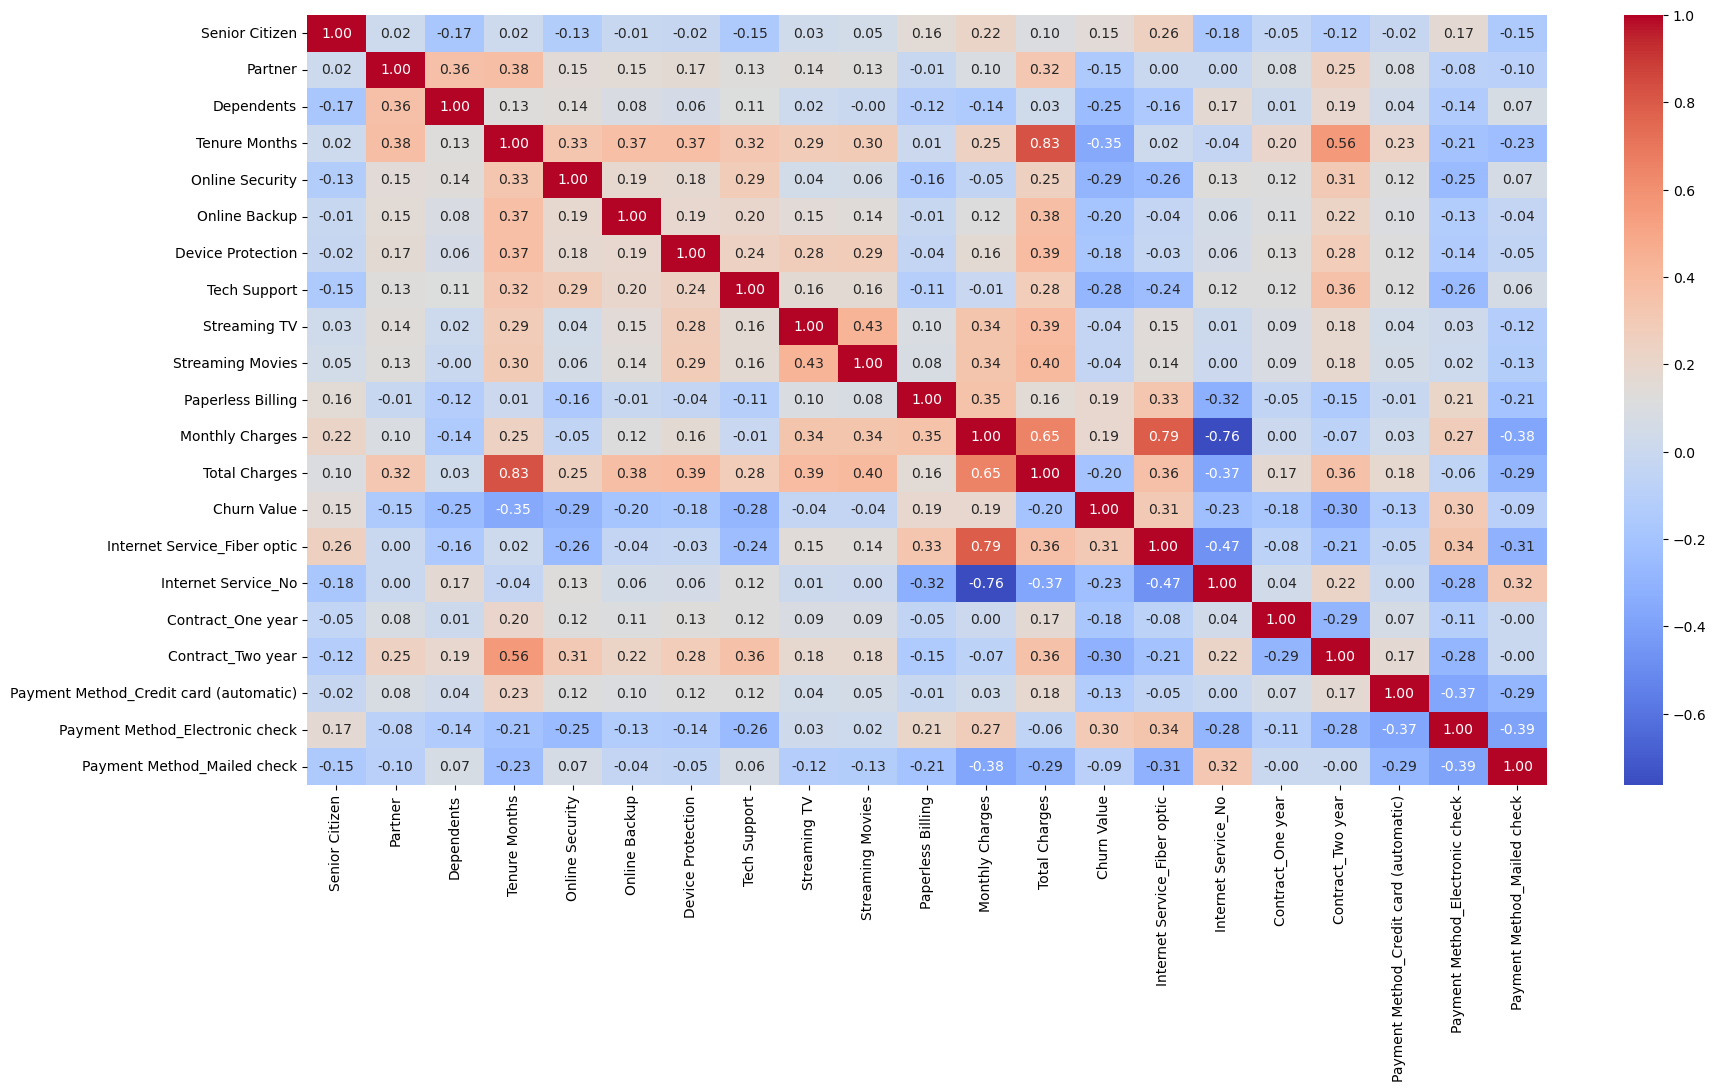

In [25]:
plt.figure(figsize = (20, 10))
sns .heatmap(
    corr_matrix,
    annot = True,
    fmt = ".2f",
    cmap = "coolwarm"
)

In [26]:
df["Total Charges"] = df["Total Charges"].fillna(df["Total Charges"].median())

In [27]:
X = df.drop(columns = "Churn Value")
y = df["Churn Value"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = KNeighborsClassifier(n_neighbors =9)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("Precision: ", precision_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1: ", f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Precision:  0.6273458445040214
Accuracy:  0.7835344215755855
Recall:  0.585
F1:  0.6054333764553687
[[870 139]
 [166 234]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1009
           1       0.63      0.58      0.61       400

    accuracy                           0.78      1409
   macro avg       0.73      0.72      0.73      1409
weighted avg       0.78      0.78      0.78      1409



In [28]:
for k in [3,5,7,9,11]:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(k, accuracy_score(y_test, y_pred))


3 0.7629524485450674
5 0.7778566359119943
7 0.7806955287437899
9 0.7835344215755855
11 0.7856635911994322
